# Rape Crime Analysis in India using Machine Learning Techniques

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Victims_of_rape.csv')
data

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [3]:
data.shape

(1050, 11)

In [4]:
data.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


In [5]:
data.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [6]:
data.columns

Index(['Area_Name', 'Year', 'Subgroup', 'Rape_Cases_Reported',
       'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_of_Rape_Total',
       'Victims_Upto_10_Yrs'],
      dtype='object')

In [7]:
data.Rape_Cases_Reported.value_counts()	

0       131
1        54
2        36
3        25
18       25
       ... 
550       1
546       1
535       1
529       1
1992      1
Name: Rape_Cases_Reported, Length: 429, dtype: int64

In [8]:
data[['Area_Name','Rape_Cases_Reported']].sort_values('Rape_Cases_Reported')[0:10]

,Area_Name,Rape_Cases_Reported
235,Dadra & Nagar Haveli,0
550,Lakshadweep,0
551,Lakshadweep,0
552,Lakshadweep,0
553,Lakshadweep,0
554,Lakshadweep,0
555,Lakshadweep,0
556,Lakshadweep,0
557,Lakshadweep,0
265,Daman & Diu,0


In [9]:
data[['Area_Name','Rape_Cases_Reported']].sort_values('Rape_Cases_Reported',ascending = False)[0:10]

,Area_Name,Rape_Cases_Reported
597,Madhya Pradesh,3135
599,Madhya Pradesh,3114
588,Madhya Pradesh,3010
594,Madhya Pradesh,2998
596,Madhya Pradesh,2984
590,Madhya Pradesh,2961
591,Madhya Pradesh,2937
582,Madhya Pradesh,2921
585,Madhya Pradesh,2900
573,Madhya Pradesh,2891


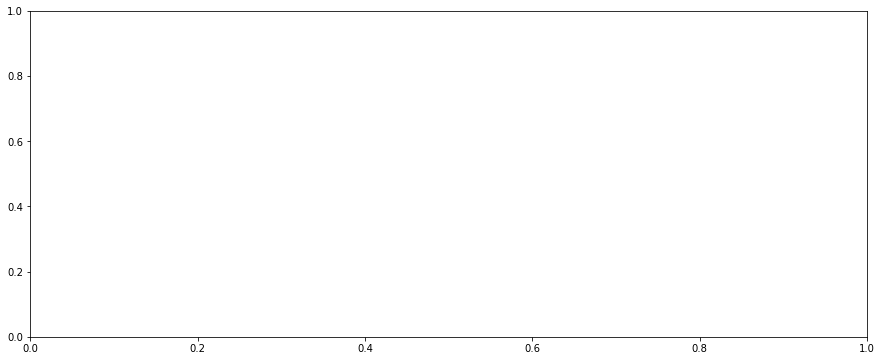

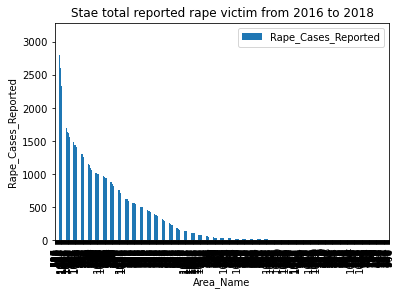

          Area_Name  Rape_Cases_Reported
597  Madhya Pradesh                 3135
599  Madhya Pradesh                 3114
588  Madhya Pradesh                 3010
594  Madhya Pradesh                 2998
596  Madhya Pradesh                 2984
..              ...                  ...
544     Lakshadweep                    0
542     Lakshadweep                    0
541     Lakshadweep                    0
540     Lakshadweep                    0
904      Tamil Nadu                    0

[1050 rows x 2 columns]


In [10]:
plt.subplots(figsize = (15,6))
cr = data[['Area_Name','Rape_Cases_Reported']].sort_values('Rape_Cases_Reported',ascending = False)
ax = cr.plot.bar()
ax.set_xlabel('Area_Name')
ax.set_ylabel('Rape_Cases_Reported')
ax.set_title('Stae total reported rape victim from 2016 to 2018')
plt.show()
print(cr)

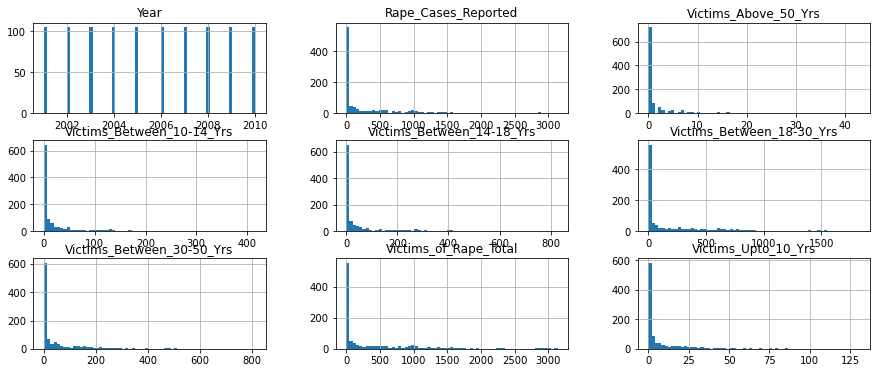

In [11]:
_ = data.hist(bins=65, figsize=(15,6))

In [12]:
my_rape_victims = data[data['Area_Name'] == 'Madhya Pradesh']

In [13]:
my_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
570,Madhya Pradesh,2001,Total Rape Victims,2851,27,304,557,1250,627,2851,86
571,Madhya Pradesh,2001,Victims of Incest Rape,301,0,39,66,130,56,301,10
572,Madhya Pradesh,2001,Victims of Other Rape,2550,27,265,491,1120,571,2550,76
573,Madhya Pradesh,2002,Total Rape Victims,2891,14,185,252,1549,811,2891,80
574,Madhya Pradesh,2002,Victims of Incest Rape,72,1,11,16,37,4,72,3


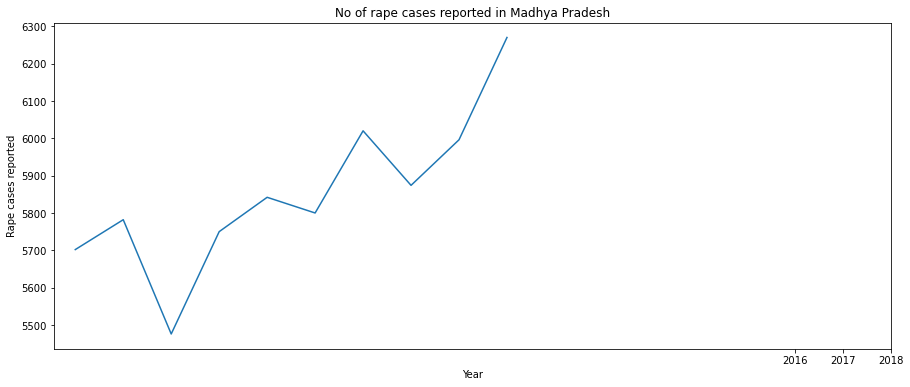

In [14]:
mp_rape_victims_by_year = my_rape_victims.groupby('Year').sum()
plt.subplots(figsize = (15,6))
ax = mp_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2016,2019,1))
ax.set(xlabel = 'Year', ylabel = 'Rape cases reported',title='No of rape cases reported in Madhya Pradesh' )
plt.show()


<AxesSubplot:xlabel='Area_Name', ylabel='Rape_Cases_Reported'>

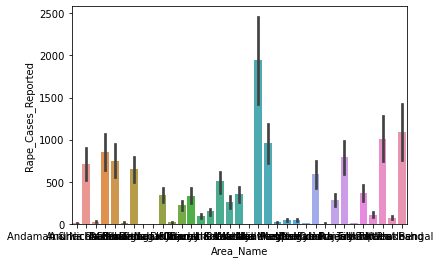

In [15]:
sns.barplot( x='Area_Name' , y='Rape_Cases_Reported', data = data)

<AxesSubplot:xlabel='Area_Name', ylabel='Rape_Cases_Reported'>

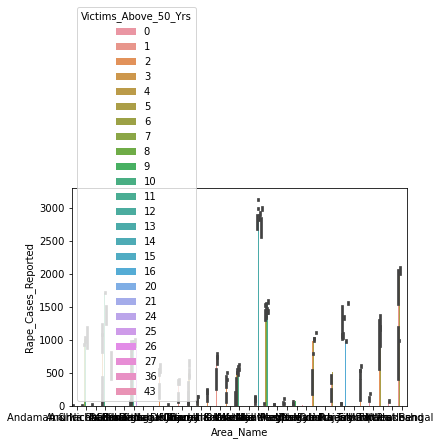

In [16]:
sns.barplot( x='Area_Name' , y='Rape_Cases_Reported',hue='Victims_Above_50_Yrs', data = data)

In [24]:
X  = data.drop(['Rape_Cases_Reported', 'Area_Name','Subgroup'], axis=1)
Y  = data['Rape_Cases_Reported']

In [25]:
X.shape

(1050, 8)

In [26]:
Y.shape

(1050,)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 50)

In [37]:
import statsmodels.api as sm

In [39]:
model = LogisticRegression()
model.fit(X_train , Y_train)

C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
print("Training Accuracy:" , model.score(X_train,Y_train))
print("Testing Accuracy:" , model.score(X_test,Y_test))


Training Accuracy: 0.2761904761904762
Testing Accuracy: 0.18571428571428572


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 50)


In [43]:
model3 = DecisionTreeRegressor(max_depth = 6)
model3.fit(X_train , Y_train)

DecisionTreeRegressor(max_depth=6)

In [46]:
y_pred = model3.predict(X_test)

In [47]:
print("Training Accuracy:" , model3.score(X_train,Y_train))
print("Testing Accuracy:" , model3.score(X_test,Y_test))

Training Accuracy: 0.9997799569923004
Testing Accuracy: 0.9994058214663617


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.2)


In [54]:
model4 = RandomForestRegressor(n_estimators = 100 , random_state =0)
model4.fit(X_train , Y_train)

RandomForestRegressor(random_state=0)

In [55]:
y_pred = model4.predict(X_test)

In [56]:
print("Training Accuracy:" , model4.score(X_train,Y_train))
print("Testing Accuracy:" , model4.score(X_test,Y_test))

Training Accuracy: 0.9999432368774026
Testing Accuracy: 0.999821463415761
